In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import torchvision
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy.fft import rfft, rfftfreq, fft, fftfreq
import scipy

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
all_sub_data = []
subjects_list = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
for sub in subjects_list:
    path = "/content/drive/MyDrive/CSE 481 Capstone/data_preprocessed_python/s"+sub+".dat"
    x = pickle.load(open(path, 'rb'), encoding = 'latin1')
    sub_data = x['data']
    sub_eeg = sub_data[:, :32, 3 * 128:]  #indexing EEG signals from physiological data
    all_sub_data.extend(sub_eeg)
    print(sub)
all_sub_data = np.array(all_sub_data)
all_sub_data.shape
np.save("/content/drive/MyDrive/CSE 481 Capstone/data", all_sub_data)

cpu
01
02
03
04
05
06
07
08
09
10
11
12
13


In [ ]:
with open('/content/drive/MyDrive/CSE 481 Capstone/data.npy', 'rb') as f:
    all_sub_data = np.load(f)

In [ ]:
# 32 particpants * 40 trials, 32 channels, 128 * 60 sec
all_sub_data.shape

(1280, 32, 7680)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# for instance in range(all_sub_data.shape[0]):
#   all_sub_data[instance] = StandardScaler().fit_transform(all_sub_data[instance])

(32, 7680)
[[ 4.05213     2.8912102  -1.77958774 ... -2.82648937 -4.47722969
  -3.67692812]
 [ 3.05326186  4.12852886 -0.01624823 ... -2.98702069 -6.28780884
  -4.47429041]
 [ 1.18607868  4.61642327  0.80339867 ... -2.6370776  -7.4065101
  -6.75590441]
 ...
 [ 2.74540878  3.13796149  4.58457769 ...  6.68885999  6.91232131
   5.66901722]
 [ 2.81410777  3.19246696  5.33090169 ...  2.6401731   6.57464869
   7.20846274]
 [ 3.66600597  4.67147056  5.00733153 ...  2.23958511  3.18256605
   4.70807159]]


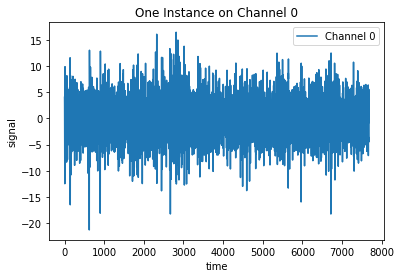

In [ ]:
# plotting one instance
one_instance=all_sub_data[0]
print(one_instance.shape)
print(one_instance)

plt.title('One Instance on Channel 0')
plt.plot(np.linspace(1, 7680, 7680), one_instance[0], label='Channel {}'.format(0))
plt.xlabel('time')
plt.ylabel('signal')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


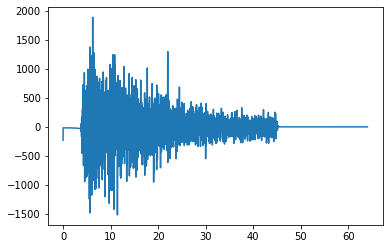

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


[-227.8772063 -0.j          -13.33497984+0.00804628j
  -13.3362521 +0.0149731j  ...    3.17700707-0.00324748j
    3.17701834-0.00162139j    3.17701993-0.j        ]
[0.00000000e+00 1.66666667e-02 3.33333333e-02 ... 6.39666667e+01
 6.39833333e+01 6.40000000e+01]
3841
[-227.8772063 -0.j          -13.33497984+0.00804628j
  -13.3362521 +0.0149731j  ...    3.17700707-0.00324748j
    3.17701834-0.00162139j    3.17701993-0.j        ]


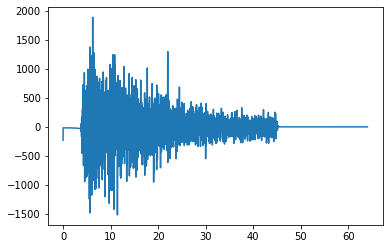

pcc ((0.033210326629944546+0.021705486758106227j), 0.03957723544538851)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3555: ComplexWarning: Casting complex values to real discards the imaginary part
  prob = 2*special.btdtr(ab, ab, 0.5*(1 - abs(np.float64(r))))


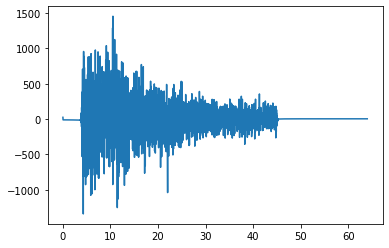

In [ ]:
# Signal decomposition for one instance
from scipy import signal


one_instance.shape
one_channel = one_instance[0]
one_channel.shape
freq = rfftfreq(one_channel.size, 1/128)
fourier = fft(one_channel)[:freq.size]

plt.plot(freq, fourier)
plt.show()
print(fourier)
print(freq)
print(len(freq))

# max = np.argmax(fourier)
# print(max)
# print(max.dtype)
# print(freq[max])
#b, a = signal.iirnotch(22.0, 30, fs=128)
#fourier = signal.filtfilt(b, a, fourier)
#fourier = signal.lfilter(b, a, fourier)
print(fourier)
# fourier[max] = 0
plt.plot(freq, fourier)
plt.show()

# plot
# plt.title('FFT of One Instance on Channel 0')
# plt.plot(freq, fourier, label='Channel {}'.format(0))
# plt.xlabel('freq')
# plt.ylabel('signal')
# plt.legend()
# plt.show()
freq2 = rfftfreq(one_channel.size, 1/128)
fourier2 = fft(one_instance[21])[:freq.size]
plt.plot(freq2, fourier2)

pcc = scipy.stats.pearsonr(fourier, fourier2)
print('pcc', pcc)

In [ ]:
hi = np.array([[1, 2], [3, 4], [5, 6]])
print(hi.shape)
print(hi[:, 0:1])
h = np.ones((3, 3))
print(h)
h2 = np.zeros((4, 3, 3))
h2[0] = h
print(h2)

(3, 2)
[[1]
 [3]
 [5]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [ ]:
fftfreq_channel = rfftfreq(all_sub_data[0][0].size, 1/ sampling_rate)
print(fftfreq_channel.size)

3841


In [ ]:
# input 1280, 32, 7680
sampling_rate = 128
trials_total = all_sub_data.shape[0]
channels_total = all_sub_data.shape[1]
time_total = all_sub_data.shape[2]
print(trials_total, channels_total, time_total)
final_data = []
count = 0
one_freq = 8
eight_freq = 64
fourteen_freq = 112
thirty_freq = 240
fourtyfive_freq = 360
for trial_num in range(trials_total): # for each trial
  trial = all_sub_data[trial_num]  # trial is 32, 7680
  start = 0
  end = 8 # 8s time window
  while (end <= 60): # until it finishes entire 60 sec video
    time_window = trial[:, start * sampling_rate: end * sampling_rate]
    start += 4
    end += 4
    #print(time_window.shape)
    transformed_channel = []
    for channel_num in range(channels_total): # for each channel
      channel_data = time_window[channel_num]
      #print(channel_data.shape)
      
      #fft_channel[max] = 0
      fftfreq_channel = rfftfreq(channel_data.size, 1/ sampling_rate)
      fft_channel = np.abs(fft(channel_data))[:fftfreq_channel.size]
      # print(fft_channel.shape)
      # max = np.argmax(fft_channel)
      # print(max)
      # plt.plot(fftfreq_channel, fft_channel)
      # one_freq = np.where(fftfreq_channel == 1)[0][0]
      # eight_freq = np.where(fftfreq_channel == 8)[0][0]
      # fourteen_freq = np.where(fftfreq_channel == 14)[0][0]
      # thirty_freq = np.where(fftfreq_channel == 30)[0][0]
      # fourtyfive_freq = np.where(fftfreq_channel == 45)[0][0]
      #print(one_freq, eight_freq, fourteen_freq, thirty_freq ,fourtyfive_freq)
      #plt.plot(fftfreq_channel, fft_channel)
      #print(fftfreq_channel.size)
      alpha_bin = fft_channel[one_freq:eight_freq]
      beta_bin = fft_channel[eight_freq:fourteen_freq]
      theta_bin = fft_channel[fourteen_freq:thirty_freq]
      gamma_bin = fft_channel[thirty_freq:fourtyfive_freq]
      all_bins = [alpha_bin, beta_bin, theta_bin, gamma_bin]
      #print(len(all_bins))
      transformed_channel.append(all_bins)
      #print(len(transformed_channel[0][1]))
    #print(len(transformed_channel[0])) # 32, 4, bin len
    binned_pcc_matrix = np.ones((4, channels_total, channels_total)) # 4, 32, 32
    for bin_num in range(4):
      pcc_matrix = binned_pcc_matrix[bin_num]  # 32, 32
      index_mover = 0
      for channel_num_i in range(0, channels_total):
        for channel_num_j in range(index_mover, channels_total):
          data1 = transformed_channel[channel_num_i][bin_num]
          data2 = transformed_channel[channel_num_j][bin_num]
          #print(scipy.stats.pearsonr(data1, data2)[0])
          pcc_num = scipy.stats.pearsonr(data1, data2)[0]
          pcc_matrix[channel_num_i][channel_num_j] = pcc_num
          pcc_matrix[channel_num_j][channel_num_i] = pcc_num
          #print(pcc_matrix[channel_num_i][channel_num_j])
        index_mover += 1;
        
      binned_pcc_matrix[bin_num] = pcc_matrix
      #print(pcc_matrix)
    #print(binned_pcc_matrix[2][25])  # 4, 32, 32
    final_data.append(binned_pcc_matrix)
    count += 1
    if (count % 500 == 0):
        print(count)

1280 32 7680
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500


In [ ]:
final_data = np.array(final_data)
print(final_data.shape)
np.save("/content/drive/MyDrive/CSE 481 Capstone/processed_data_fft_abs", final_data)
with open('/content/drive/MyDrive/CSE 481 Capstone/processed_data_fft_abs.npy', 'rb') as f:
    a = np.load(f)
print(a.shape)

(17920, 4, 32, 32)
(17920, 4, 32, 32)


In [ ]:
with open('/content/drive/MyDrive/CSE 481 Capstone/processed_data.npy', 'rb') as f:
    a = np.load(f)
print(a.shape)
print(a[0])